# Clustering Songs by Mood

Let's import our personal data obtained from the Spotify API. 

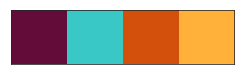

In [113]:
import pandas as pd
import numpy as np
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [61]:
izzy2018_df = pd.read_csv('izzy2018_df.csv')
izzy2019_df = pd.read_csv('izzy2019_df.csv')
bestofdecade_df = pd.read_csv('bestofdecade_df.csv')

## My 2018 Moods

In [62]:
izzy2018_df.head()

,track,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence
0,Let Me Down Easy,0.22000,0.672,0.899,0.142,-6.878,0.0323,139.010,0.927
1,Nice For What,0.09340,0.567,0.913,0.114,-6.471,0.0736,93.350,0.792
2,Paris in the Rain,0.77100,0.426,0.408,0.394,-9.419,0.0524,76.309,0.528
3,Slow (feat. Noah Cyrus) - CID Remix,0.00381,0.547,0.901,0.682,-3.627,0.0512,125.854,0.257
4,Kick On,0.00989,0.322,0.769,0.185,-5.858,0.0371,144.480,0.508


In [63]:
izzy2018_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
track           100 non-null object
acousticness    100 non-null float64
danceability    100 non-null float64
energy          100 non-null float64
liveness        100 non-null float64
loudness        100 non-null float64
speechiness     100 non-null float64
tempo           100 non-null float64
valence         100 non-null float64
dtypes: float64(8), object(1)
memory usage: 7.1+ KB


In [64]:
izzy2018_df.describe()

,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.236116,0.657530,0.621010,0.185413,-6.949190,0.106381,121.785240,0.506907
std,0.245601,0.151544,0.167355,0.147916,2.656847,0.113218,27.199954,0.214570
min,0.000047,0.240000,0.116000,0.046300,-18.564000,0.024600,76.309000,0.069000
25%,0.035075,0.557750,0.497750,0.099200,-8.486250,0.037625,100.643500,0.349250
50%,0.143500,0.675500,0.628500,0.114000,-6.765500,0.055900,120.006500,0.498500
75%,0.385750,0.775500,0.746250,0.221500,-5.095750,0.121750,139.919750,0.642500
max,0.952000,0.939000,0.942000,0.874000,-2.420000,0.681000,200.040000,0.968000


In [65]:
#izzy2018_df = izzy2018_df.drop(['energy','valence','tempo'],axis=1)
#izzy2018_df.head()

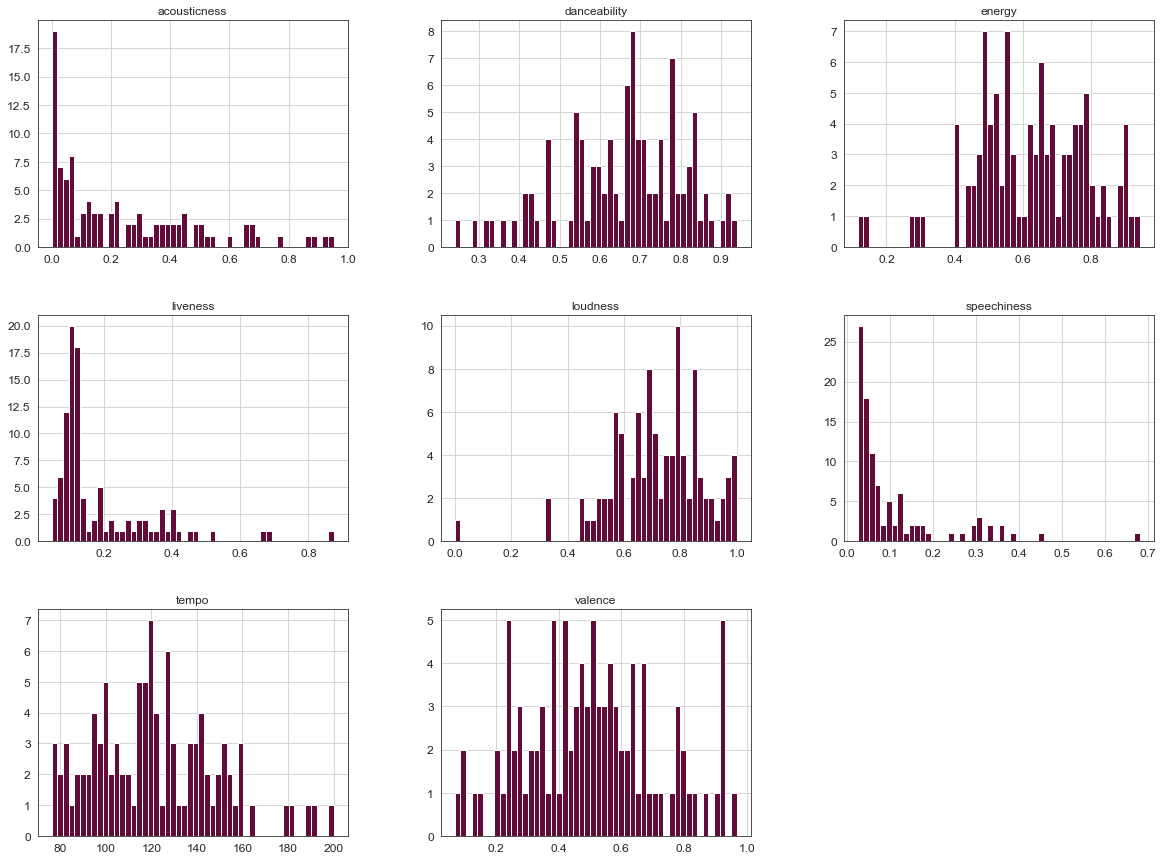

In [66]:
# Loudness feature is from -60db to 0 so we will normalise this column between 0 and 1
# Tempo feature is in BPM so we will scale between 0 and 1 too
from sklearn import preprocessing

loudness = izzy2018_df[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
izzy2018_df['loudness'] = pd.DataFrame(loudness_scaled)

izzy2018_df.hist(bins=50,figsize=(20,15));

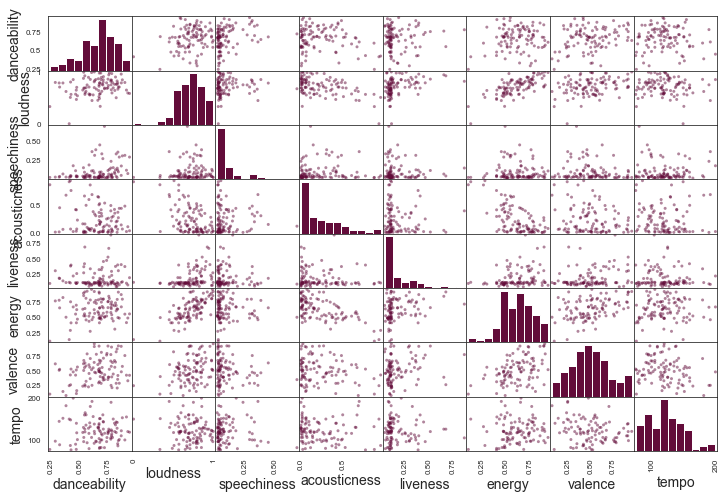

In [67]:
from pandas.plotting import scatter_matrix
# attributes should contain the features we want to compare
attributes = ['danceability','loudness','speechiness','acousticness','liveness','energy','valence','tempo']

scatter_matrix(izzy2018_df[attributes],figsize=(12,8));

In [68]:
# remove song names before clustering
features = izzy2018_df.copy()
features = izzy2018_df.drop(['track'],axis=1)

In [69]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(features)
    Sum_of_squared_distances.append(km.inertia_)

In [70]:
from sklearn.metrics import silhouette_score

for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5648643049532183)
For n_clusters = 3, silhouette score is 0.5566670967753737)
For n_clusters = 4, silhouette score is 0.6065764993110844)
For n_clusters = 5, silhouette score is 0.5957784625370371)
For n_clusters = 6, silhouette score is 0.5837246207205465)
For n_clusters = 7, silhouette score is 0.586167124826762)
For n_clusters = 8, silhouette score is 0.5758271154172876)
For n_clusters = 9, silhouette score is 0.5691128313913072)
For n_clusters = 10, silhouette score is 0.5795058753148509)
For n_clusters = 11, silhouette score is 0.5816729017598569)
For n_clusters = 12, silhouette score is 0.5663898764667188)
For n_clusters = 13, silhouette score is 0.5597378601342691)
For n_clusters = 14, silhouette score is 0.5511751916337143)


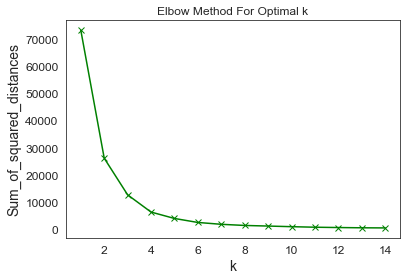

In [71]:
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [72]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [73]:
# PCA to reduce our data to 2 dimensions for visualisation
from sklearn.decomposition import PCA
y_kmeans = kmeans.predict(features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)

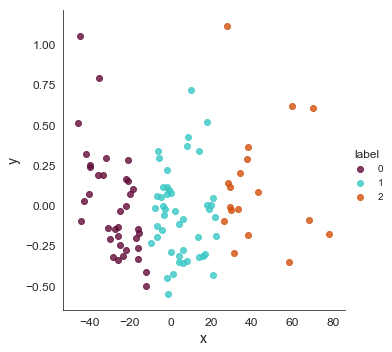

In [83]:
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [75]:
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
#T-SNE with two dimensions
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(features)

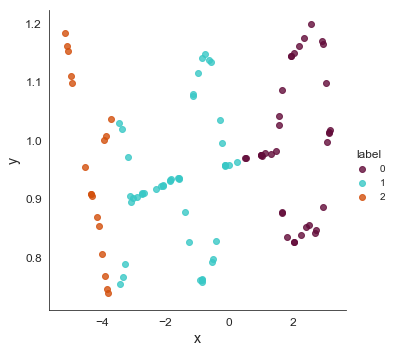

In [76]:
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [77]:
pca.explained_variance_ratio_

array([9.99707858e-01, 1.35733084e-04])

In [78]:
# Dump components relations with features:
print (pd.DataFrame(pca.components_,columns=features.columns,index = ['PC-1','PC-2']))

      acousticness  danceability    energy  liveness  loudness  speechiness  \
PC-1     -0.000864     -0.000100  0.000521 -0.000272 -0.000468    -0.000103   
PC-2      0.657518     -0.163621 -0.448049 -0.153659 -0.395319     0.004238   

         tempo   valence  
PC-1  0.999998 -0.001614  
PC-2 -0.000088 -0.400305  


In [84]:
izzy2018_df['label'] = y_kmeans

# shuffle dataset

izzy2018_df = izzy2018_df.sample(frac=1)
izzy2018_df['label'].value_counts()

1    46
0    36
2    18
Name: label, dtype: int64

In [85]:
izzy2018_df[izzy2018_df['label'] == 0]

,track,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence,label
25,Tell Me You Love Me,0.11700,0.762,0.797,0.2020,0.982037,0.1350,122.066,0.525,0
11,Better Not (feat. Wafia),0.27800,0.783,0.537,0.2290,0.968967,0.0749,113.977,0.392,0
48,Hell & Back,0.68500,0.382,0.498,0.1140,0.622522,0.0377,181.881,0.069,0
63,The Chain,0.01620,0.682,0.492,0.1070,0.335295,0.0569,151.016,0.398,0
82,Calypso,0.13800,0.866,0.859,0.4010,0.958684,0.0587,109.972,0.923,0
70,Snow,0.14000,0.741,0.578,0.1110,0.682916,0.0296,105.727,0.800,0
34,"The Deepest Sighs, the Frankest Shadows",0.05650,0.355,0.812,0.1410,0.786856,0.0767,151.818,0.139,0
7,Life Itself,0.01470,0.699,0.670,0.3560,0.764680,0.0347,111.988,0.556,0
3,Slow (feat. Noah Cyrus) - CID Remix,0.00381,0.547,0.901,0.6820,0.925235,0.0512,125.854,0.257,0
39,I Like It,0.09900,0.816,0.726,0.3720,0.902255,0.1290,136.048,0.650,0


In [86]:
izzy2018_df[izzy2018_df['label'] == 1]

,track,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence,label
80,The Ringer,0.031100,0.939,0.551,0.1920,0.584613,0.2910,118.552,0.4200,1
36,Flow,0.158000,0.529,0.626,0.1140,0.650273,0.0490,117.985,0.2310,1
16,Back Down South,0.063400,0.476,0.619,0.2580,0.702614,0.0398,117.113,0.1540,1
77,Way to be Loved,0.605000,0.583,0.515,0.0931,0.574889,0.0571,115.732,0.6030,1
38,Lucky You (feat. Joyner Lucas),0.062700,0.876,0.786,0.1270,0.847374,0.3060,153.068,0.5750,1
83,Changing Of The Seasons,0.000047,0.535,0.881,0.1100,0.876177,0.1560,129.975,0.6210,1
14,Satisfied (feat. MAX),0.007590,0.750,0.651,0.5210,0.861558,0.1210,120.055,0.9280,1
10,Chateau,0.658000,0.661,0.585,0.1020,0.452738,0.0367,129.980,0.6060,1
37,Bootleg Rascal,0.508000,0.671,0.481,0.0835,0.523600,0.0486,136.045,0.4870,1
33,ATM,0.115000,0.719,0.497,0.0898,0.675359,0.6810,81.651,0.3450,1


In [87]:
izzy2018_df[izzy2018_df['label'] == 2]

,track,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence,label
13,The Man,0.072700,0.606,0.942,0.0709,0.988974,0.1150,106.020,0.518,2
12,In My Feelings,0.058900,0.835,0.626,0.3960,0.788590,0.1250,91.030,0.350,2
58,Bulletproof,0.000441,0.674,0.882,0.0680,0.978258,0.0477,123.016,0.682,2
53,Good Nights (feat. Mascolo),0.443000,0.849,0.483,0.0786,0.709242,0.2910,101.015,0.282,2
5,Love Lies (with Normani),0.095600,0.708,0.648,0.1340,0.801412,0.0449,143.955,0.338,2
0,Let Me Down Easy,0.220000,0.672,0.899,0.1420,0.723860,0.0323,139.010,0.927,2
56,Stranger Things,0.443000,0.867,0.663,0.1170,0.788280,0.1780,121.978,0.481,2
75,KOD,0.210000,0.831,0.782,0.1130,0.761274,0.1500,141.869,0.199,2
21,Alone (Feat. Big Sean & Stefflon Don),0.016400,0.445,0.662,0.2190,0.852453,0.1810,200.040,0.479,2
23,Need You,0.262000,0.753,0.750,0.0928,0.737797,0.0345,117.995,0.388,2


## My 2019 Moods

## Throughout the decade

## All My Songs 

In [175]:
songs_df = pd.read_csv('mysongsdf.csv')
songs_df.head()

,track,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence
0,Autumn Leaves - Deluxe Edition,0.89200,0.555,0.257,0.1240,-12.637,0.0299,89.013,0.431
1,I'm Not The Only One,0.56200,0.515,0.494,0.0771,-5.780,0.0416,81.329,0.474
2,If I Ever Feel Better,0.04920,0.755,0.553,0.0646,-9.449,0.1070,119.700,0.836
3,Electric Love,0.00448,0.621,0.853,0.2360,-6.537,0.0615,120.017,0.650
4,lovers’ carvings,0.68000,0.558,0.470,0.5320,-5.500,0.0316,118.060,0.427


In [176]:
songs_df.describe()

,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.278151,0.591817,0.598676,0.175615,-7.500083,0.068941,118.518037,0.472354
std,0.289125,0.149982,0.204575,0.142033,3.098334,0.073549,28.205632,0.230039
min,0.000139,0.192000,0.076800,0.024800,-20.284000,0.024600,60.042000,0.054400
25%,0.037150,0.503250,0.460500,0.096675,-9.142500,0.033700,97.070250,0.289500
50%,0.161000,0.596500,0.627000,0.118000,-7.035500,0.043300,118.150500,0.433000
75%,0.453000,0.696250,0.757250,0.201250,-5.280000,0.066125,137.887250,0.650000
max,0.977000,0.946000,0.966000,0.912000,-1.542000,0.681000,217.978000,0.974000


In [177]:
songs_df = songs_df.drop(['energy','valence','tempo'],axis=1)
songs_df.head()

,track,acousticness,danceability,liveness,loudness,speechiness
0,Autumn Leaves - Deluxe Edition,0.89200,0.555,0.1240,-12.637,0.0299
1,I'm Not The Only One,0.56200,0.515,0.0771,-5.780,0.0416
2,If I Ever Feel Better,0.04920,0.755,0.0646,-9.449,0.1070
3,Electric Love,0.00448,0.621,0.2360,-6.537,0.0615
4,lovers’ carvings,0.68000,0.558,0.5320,-5.500,0.0316


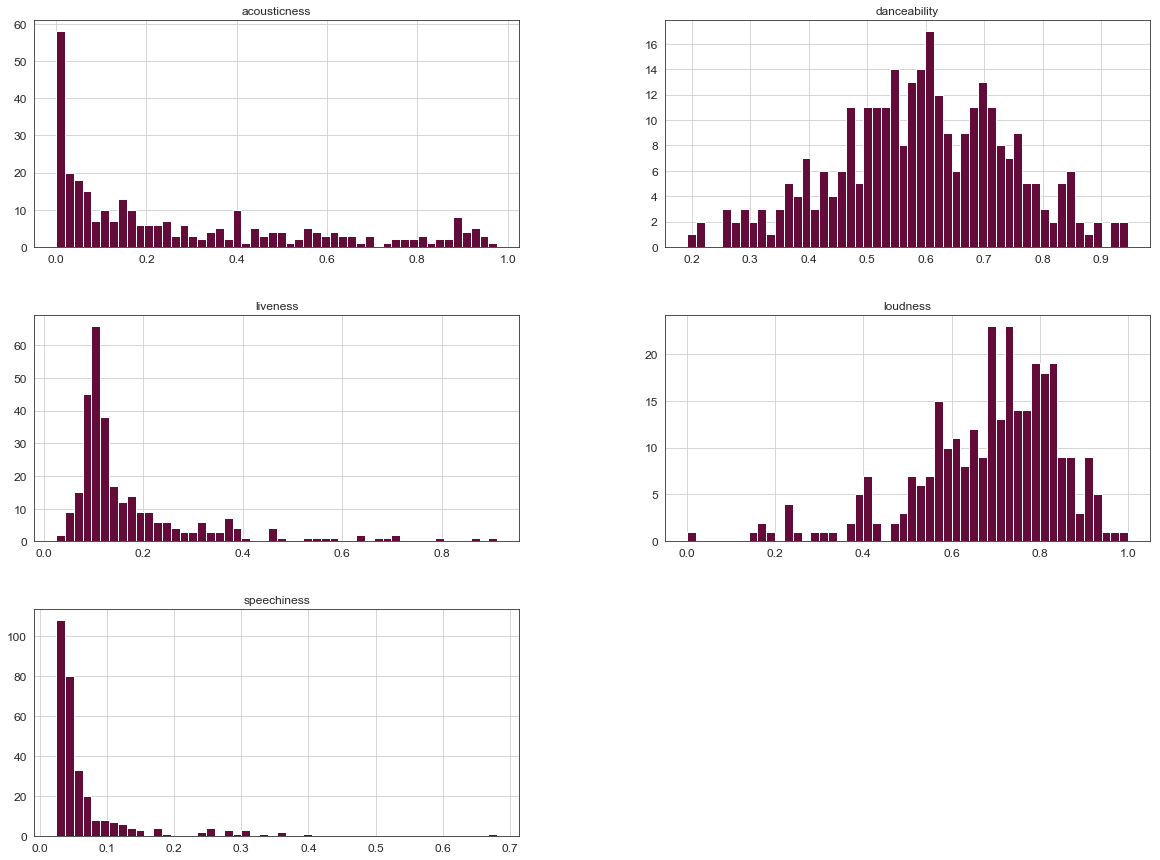

In [178]:
loudness = songs_df[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
songs_df['loudness'] = pd.DataFrame(loudness_scaled)

songs_df.hist(bins=50,figsize=(20,15));

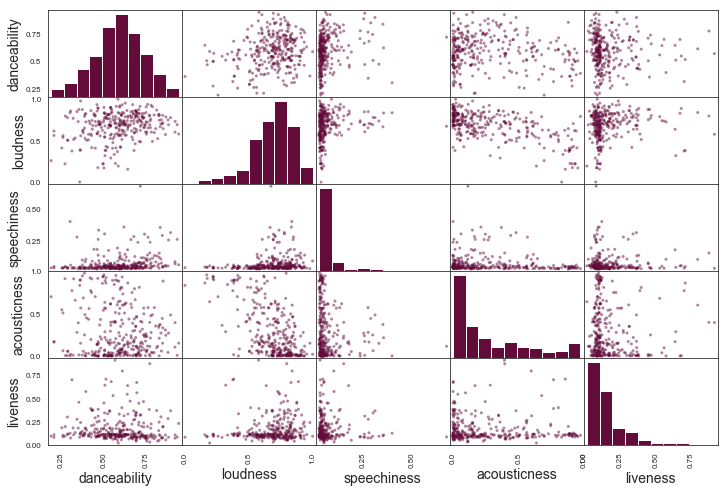

In [180]:
# attributes should contain the features we want to compare
attributes = ['danceability','loudness','speechiness','acousticness','liveness']

scatter_matrix(songs_df[attributes],figsize=(12,8));

In [181]:
# remove song names before clustering
features = songs_df.copy()
features = songs_df.drop(['track'],axis=1)

In [182]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(features)
    Sum_of_squared_distances.append(km.inertia_)

In [183]:
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.45335589974236645)
For n_clusters = 3, silhouette score is 0.3128940876803863)
For n_clusters = 4, silhouette score is 0.2898011508513744)
For n_clusters = 5, silhouette score is 0.24759741212813016)
For n_clusters = 6, silhouette score is 0.24207637782133473)
For n_clusters = 7, silhouette score is 0.2509818181640528)
For n_clusters = 8, silhouette score is 0.2341161451938683)
For n_clusters = 9, silhouette score is 0.2282213939231055)
For n_clusters = 10, silhouette score is 0.2238766965142664)
For n_clusters = 11, silhouette score is 0.22555106375022888)
For n_clusters = 12, silhouette score is 0.22599158136439315)
For n_clusters = 13, silhouette score is 0.2145825437742815)
For n_clusters = 14, silhouette score is 0.22456637218385084)


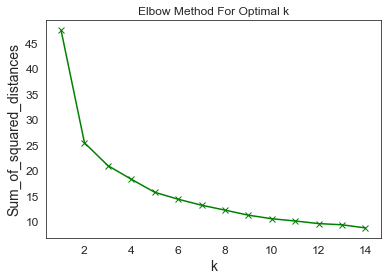

In [184]:
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [185]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [186]:
y_kmeans = kmeans.predict(features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)

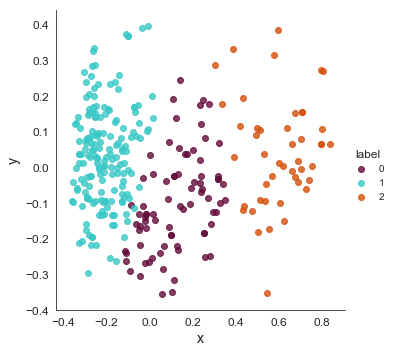

In [187]:
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [188]:
#T-SNE with two dimensions
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(features)

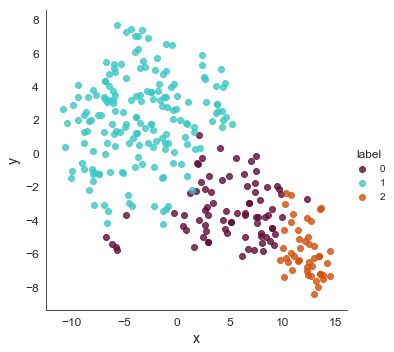

In [189]:
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [190]:
pca.explained_variance_ratio_

array([0.60864102, 0.14625254])

In [191]:
# Dump components relations with features:
print (pd.DataFrame(pca.components_,columns=features.columns,index = ['PC-1','PC-2']))

      acousticness  danceability  liveness  loudness  speechiness
PC-1      0.913446     -0.098986 -0.041715 -0.390824    -0.036539
PC-2     -0.212634     -0.920606  0.148766 -0.269154    -0.112677


In [192]:
songs_df['label'] = y_kmeans

# shuffle dataset

songs_df = songs_df.sample(frac=1)
songs_df['label'].value_counts()

1    175
0     79
2     46
Name: label, dtype: int64

In [193]:
songs_df[songs_df['label'] == 0]

,track,acousticness,danceability,liveness,loudness,speechiness,label
6,#88,0.399,0.543,0.0812,0.566108,0.0586,0
178,Spirit Bird,0.488,0.392,0.1270,0.528919,0.0383,0
273,My Life,0.227,0.744,0.1030,0.661295,0.0378,0
139,ILYSB,0.603,0.623,0.3160,0.723189,0.0518,0
205,Need You,0.262,0.753,0.0928,0.727297,0.0345,0
184,Home,0.292,0.542,0.1770,0.728898,0.0318,0
268,Norf Norf,0.394,0.925,0.1100,0.731619,0.0658,0
135,Hoops,0.248,0.738,0.4680,0.771743,0.0321,0
237,It's Strange (feat. K.Flay),0.371,0.837,0.1020,0.666524,0.3540,0
168,Every Other Freckle,0.614,0.543,0.1180,0.674848,0.0700,0


In [194]:
songs_df[songs_df['label'] == 1]

,track,acousticness,danceability,liveness,loudness,speechiness,label
9,Gold on the Ceiling,0.007720,0.505,0.0690,0.835130,0.0475,1
276,Confidence,0.063700,0.590,0.1050,0.569683,0.0505,1
194,I'm Yours,0.005810,0.504,0.1810,0.901771,0.1250,1
190,Love Love Love - AU Master,0.188000,0.519,0.1590,0.794206,0.0263,1
74,Fix You,0.163000,0.209,0.1130,0.615943,0.0338,1
3,Electric Love,0.004480,0.621,0.2360,0.733486,0.0615,1
170,Friday I'm in Love,0.000972,0.526,0.3380,0.418685,0.0342,1
41,Atomic Man,0.050700,0.630,0.1090,0.692669,0.0384,1
130,Youth,0.108000,0.648,0.1130,0.665937,0.0306,1
220,Tell Me You Love Me,0.117000,0.762,0.2020,0.937680,0.1350,1


In [195]:
songs_df[songs_df['label'] == 2]

,track,acousticness,danceability,liveness,loudness,speechiness,label
40,Skinny Love,0.843,0.565,0.1090,0.333155,0.0579,2
24,First Day Of My Life,0.915,0.468,0.0952,0.173941,0.0388,2
91,Try,0.807,0.603,0.1080,0.560986,0.0288,2
42,"Free Fallin' - Live at the Nokia Theatre, Los ...",0.771,0.315,0.7020,0.374667,0.0317,2
204,Paris in the Rain,0.771,0.426,0.3940,0.579714,0.0524,2
44,Broken Brights,0.664,0.689,0.0967,0.461424,0.0293,2
87,Make You Feel My Love,0.910,0.325,0.1130,0.514193,0.0311,2
69,Paint,0.896,0.364,0.1230,0.385871,0.0402,2
110,Ho Hey,0.794,0.685,0.0915,0.598122,0.0304,2
68,Guiding Light (featuring Ed Sheeran),0.700,0.453,0.1010,0.409615,0.0290,2


# Machine Learning Recommendations

In [196]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

X = features
y = y_kmeans

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [197]:
# Predicting the Test set results
y_pred = rfc.predict(X_test)

In [198]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[18  2  0]
 [ 0 32  0]
 [ 2  0  6]]


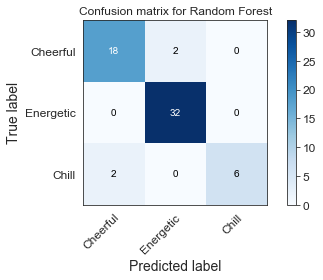

In [199]:
# Confusion matrix
definitions = ['Cheerful','Energetic','Chill']
# reversefactor = dict(zip(range(4),definitions))
# actual = np.vectorize(reversefactor.get)(y_test)
# pred = np.vectorize(reversefactor.get)(y_pred)
# print(pd.crosstab(actual, pred, rownames=['Actual Mood'], colnames=['Predicted Mood']))

plot_confusion_matrix(y_test, y_pred, classes=definitions,
                      title='Confusion matrix for Random Forest')

In [200]:
# View a list of the features and their importance scores
features = features.columns
list(zip(features, rfc.feature_importances_))

[('acousticness', 0.7191077199440501),
 ('danceability', 0.07437398933930137),
 ('liveness', 0.02614887774481801),
 ('loudness', 0.13549464027667),
 ('speechiness', 0.044874772695160624)]

In [201]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
# Train the model using the training sets
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [202]:
knn_pred =knn.predict(X_test)

Confusion matrix, without normalization
[[18  2  0]
 [ 0 32  0]
 [ 2  0  6]]


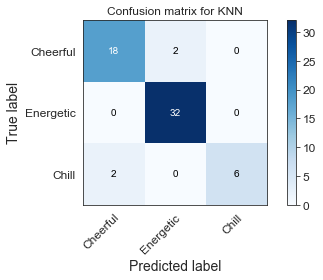

In [203]:
plot_confusion_matrix(y_test, knn_pred, classes=definitions,
                      title='Confusion matrix for KNN')

In [204]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
svm = svm.SVC(kernel="linear") 

#Train the model using the training sets
svm.fit(X_train, y_train)

#Predict the response for test dataset
svm_pred = svm.predict(X_test)

Confusion matrix, without normalization
[[18  2  0]
 [ 0 32  0]
 [ 2  0  6]]


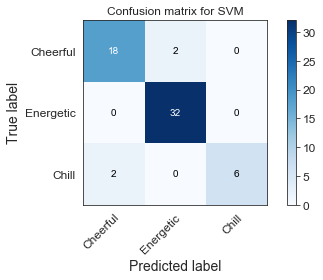

In [205]:
plot_confusion_matrix(y_test, svm_pred, classes=definitions,
                      title='Confusion matrix for SVM')

In [206]:
from sklearn.neural_network import MLPClassifier

In [207]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

C:\Users\isali\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [208]:
mlp_pred = mlp.predict(X_test)

Confusion matrix, without normalization
[[17  3  0]
 [ 0 32  0]
 [ 2  0  6]]


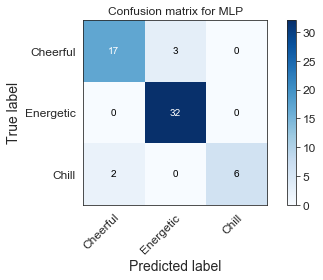

In [209]:
plot_confusion_matrix(y_test, mlp_pred, classes=definitions,
                      title='Confusion matrix for MLP')

In [210]:
print(classification_report(y_test,mlp_pred,target_names=definitions)+'MLP')

              precision    recall  f1-score   support

    Cheerful       0.89      0.85      0.87        20
   Energetic       0.91      1.00      0.96        32
       Chill       1.00      0.75      0.86         8

    accuracy                           0.92        60
   macro avg       0.94      0.87      0.89        60
weighted avg       0.92      0.92      0.91        60
MLP


In [211]:
print(classification_report(y_test,svm_pred,target_names=definitions)+'SVM')

              precision    recall  f1-score   support

    Cheerful       0.90      0.90      0.90        20
   Energetic       0.94      1.00      0.97        32
       Chill       1.00      0.75      0.86         8

    accuracy                           0.93        60
   macro avg       0.95      0.88      0.91        60
weighted avg       0.94      0.93      0.93        60
SVM


In [212]:
print(classification_report(y_test,knn_pred,target_names=definitions)+'KNN')

              precision    recall  f1-score   support

    Cheerful       0.90      0.90      0.90        20
   Energetic       0.94      1.00      0.97        32
       Chill       1.00      0.75      0.86         8

    accuracy                           0.93        60
   macro avg       0.95      0.88      0.91        60
weighted avg       0.94      0.93      0.93        60
KNN


In [213]:
print(classification_report(y_test,y_pred,target_names=definitions)+'forest')

              precision    recall  f1-score   support

    Cheerful       0.90      0.90      0.90        20
   Energetic       0.94      1.00      0.97        32
       Chill       1.00      0.75      0.86         8

    accuracy                           0.93        60
   macro avg       0.95      0.88      0.91        60
weighted avg       0.94      0.93      0.93        60
forest
